# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
api_key = "weather_api_key"
BASE_URL =  f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuren-haebaru
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | jasper
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | mossel bay
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | pangai
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | tanguieta
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | springs
Processing Record 18 of Set 1 | sokal'
City not found. Skipping...
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | la ciotat
Processing Record 21 of Set 1 | tuensang
Processing Record 22 of Set 1 | kodiak
Processing Record

Processing Record 38 of Set 4 | howard springs
Processing Record 39 of Set 4 | tadine
Processing Record 40 of Set 4 | mont-dore
Processing Record 41 of Set 4 | taiohae
City not found. Skipping...
Processing Record 42 of Set 4 | otacilio costa
Processing Record 43 of Set 4 | badger
Processing Record 44 of Set 4 | senanga
Processing Record 45 of Set 4 | tokar
Processing Record 46 of Set 4 | vadso
Processing Record 47 of Set 4 | santo nino
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | aasiaat
Processing Record 0 of Set 5 | ribeira grande
Processing Record 1 of Set 5 | moab
Processing Record 2 of Set 5 | fazendas de almeirim
Processing Record 3 of Set 5 | colonia
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | mugia
Processing Record 6 of Set 5 | trenggalek
Processing Record 7 of Set 5 | tabas
Processing Record 8 of Set 5 | thetford-mines
Processing Record 9 of Set 5 | chernyshevsk
Processing Record 10 of Set 5 | shahr-e kord
Processing Rec

Processing Record 27 of Set 8 | kozle
Processing Record 28 of Set 8 | saratamata
City not found. Skipping...
Processing Record 29 of Set 8 | guaruja
Processing Record 30 of Set 8 | piti village
Processing Record 31 of Set 8 | kanniyakumari
Processing Record 32 of Set 8 | sittwe
Processing Record 33 of Set 8 | dubois
Processing Record 34 of Set 8 | szolnok
Processing Record 35 of Set 8 | ulsteinvik
Processing Record 36 of Set 8 | bac lieu
Processing Record 37 of Set 8 | tazacorte
Processing Record 38 of Set 8 | haiku-pauwela
Processing Record 39 of Set 8 | grand falls-windsor
Processing Record 40 of Set 8 | wuxi
Processing Record 41 of Set 8 | george town
Processing Record 42 of Set 8 | xai-xai
Processing Record 43 of Set 8 | fortaleza
Processing Record 44 of Set 8 | kyshtovka
Processing Record 45 of Set 8 | dobrinka
Processing Record 46 of Set 8 | balabac
Processing Record 47 of Set 8 | quang ngai
Processing Record 48 of Set 8 | karratha
Processing Record 49 of Set 8 | aromashevo
Proce

Processing Record 18 of Set 12 | lauro de freitas
Processing Record 19 of Set 12 | mongu
Processing Record 20 of Set 12 | yima
Processing Record 21 of Set 12 | greymouth
Processing Record 22 of Set 12 | baley
Processing Record 23 of Set 12 | abepura
Processing Record 24 of Set 12 | belozersk
Processing Record 25 of Set 12 | kultali
City not found. Skipping...
Processing Record 26 of Set 12 | djelfa
Processing Record 27 of Set 12 | aral
Processing Record 28 of Set 12 | tamanrasset
Processing Record 29 of Set 12 | santa elena de uairen
Processing Record 30 of Set 12 | luwuk
Processing Record 31 of Set 12 | chilmari
Processing Record 32 of Set 12 | beloyarskiy
Processing Record 33 of Set 12 | general villegas
Processing Record 34 of Set 12 | tlahualilo de zaragoza
Processing Record 35 of Set 12 | merizo village
Processing Record 36 of Set 12 | marrakesh
Processing Record 37 of Set 12 | sterling
Processing Record 38 of Set 12 | onguday
Processing Record 39 of Set 12 | kargasok
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuren-haebaru,26.3369,127.8719,23.43,46,0,6.69,JP,1707795497
1,uturoa,-16.7333,-151.4333,27.53,85,100,11.45,PF,1707795498
2,constantia,44.1833,28.6500,4.38,83,100,2.65,RO,1707795498
3,tiksi,71.6872,128.8694,-32.22,100,100,1.29,RU,1707795499
4,anadyr,64.7500,177.4833,-29.72,74,0,5.00,RU,1707795499


In [7]:
# Export the City_Data into a csv
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuren-haebaru,26.3369,127.8719,23.43,46,0,6.69,JP,1707795497
1,uturoa,-16.7333,-151.4333,27.53,85,100,11.45,PF,1707795498
2,constantia,44.1833,28.6500,4.38,83,100,2.65,RO,1707795498
3,tiksi,71.6872,128.8694,-32.22,100,100,1.29,RU,1707795499
4,anadyr,64.7500,177.4833,-29.72,74,0,5.00,RU,1707795499


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

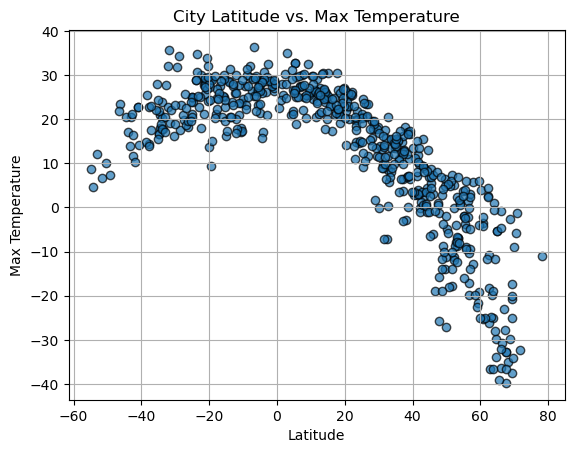

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

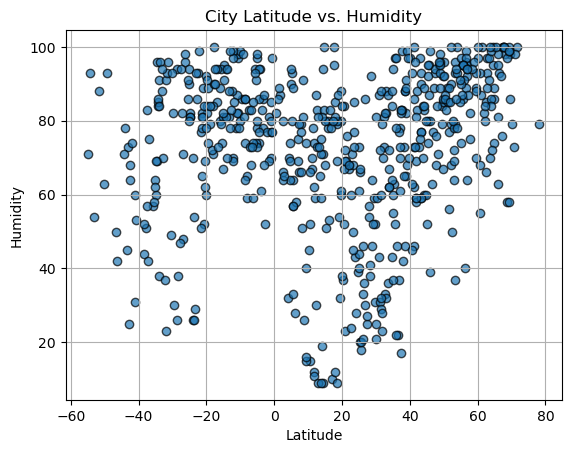

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

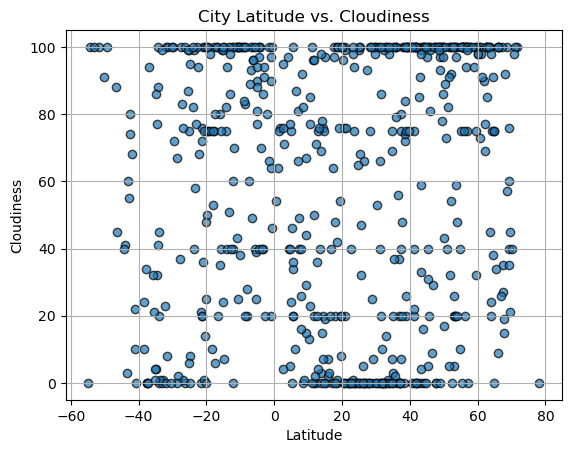

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

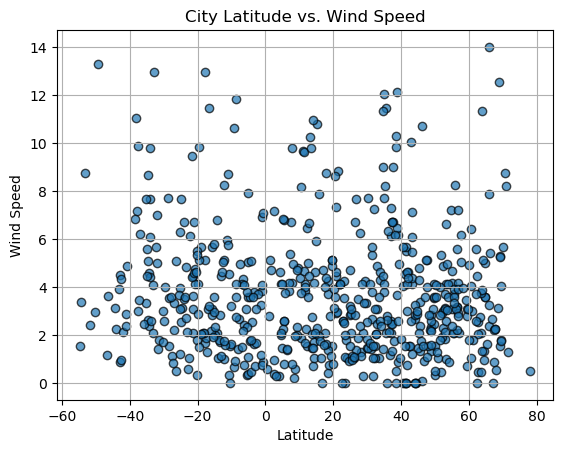

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, output_file):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.7)
    plt.plot(x_values, regression_line, color="red", label="Linear Regression")
    
    equation = f"y = {slope:.2f}x + {intercept}"
    
    plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color="red")
    
    # Keep the print statement for R-value
    print(f"The R-Value is: {r_value:.2f}")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    plt.savefig(output_file)
    plt.show()    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuren-haebaru,26.3369,127.8719,23.43,46,0,6.69,JP,1707795497
2,constantia,44.1833,28.6500,4.38,83,100,2.65,RO,1707795498
3,tiksi,71.6872,128.8694,-32.22,100,100,1.29,RU,1707795499
4,anadyr,64.7500,177.4833,-29.72,74,0,5.00,RU,1707795499
5,jasper,37.2001,-94.3502,3.64,78,0,2.57,US,1707795500


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,uturoa,-16.7333,-151.4333,27.53,85,100,11.45,PF,1707795498
6,adamstown,-25.0660,-130.1015,25.04,90,99,6.30,PN,1707795501
7,mossel bay,-34.1831,22.1460,17.96,84,41,4.60,ZA,1707795501
9,pangai,-19.8000,-174.3500,29.06,84,75,4.12,TO,1707795502
10,avarua,-21.2078,-159.7750,29.03,65,20,3.09,CK,1707795503


###  Temperature vs. Latitude Linear Regression Plot

The R-Value is: -0.88


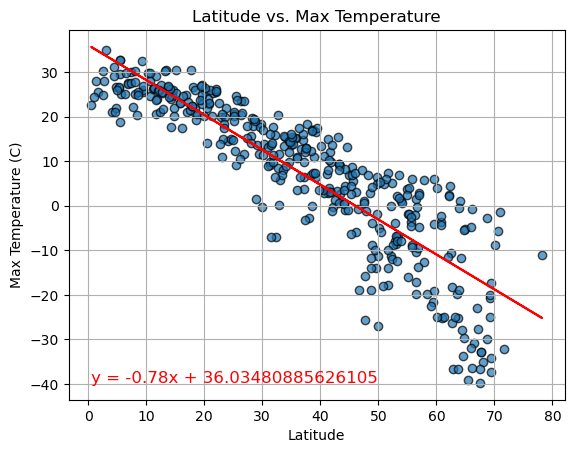

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (C)",
                       "output_data/Linear_Reg_Northern_Hemi_Max_Temp.png")

The R-Value is: 0.55


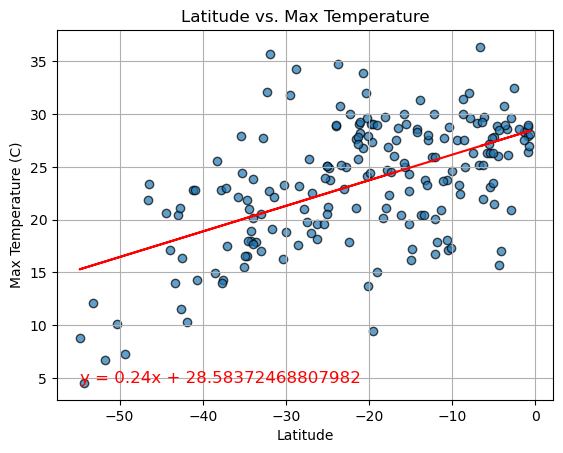

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (C)",
                       "output_data/Linear_Reg_Southern_Hemi_Max_Temp.png")

The data shows there is a strong  relationship (R-value = 0.88) in the Northern Hemisphere between latitude and maximum temperature. As latitude increases or decreases, there is a significant impact on temperature. In the Southern Hemisphere, there is a moderately strong relationship (R-value = 0.48) between maximum temperature and latitude. While latitude influences maximum temperature, the relationship is not as pronounced as observed in the Northern Hemisphere. 


### Humidity vs. Latitude Linear Regression Plot

The R-Value is: 0.44


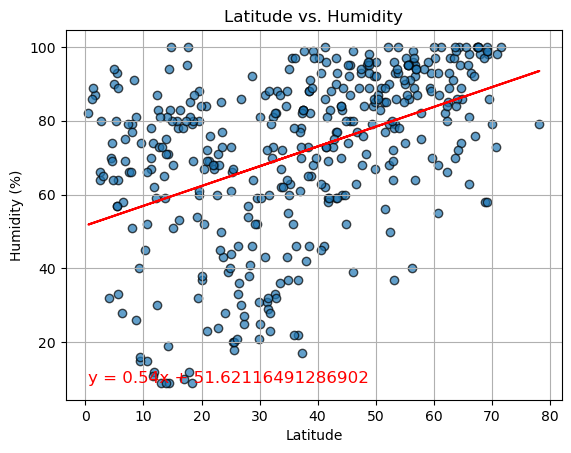

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity (%)",
                       "output_data/Linear_Reg_Northern_Hemi_Humidity.png")

The R-Value is: 0.33


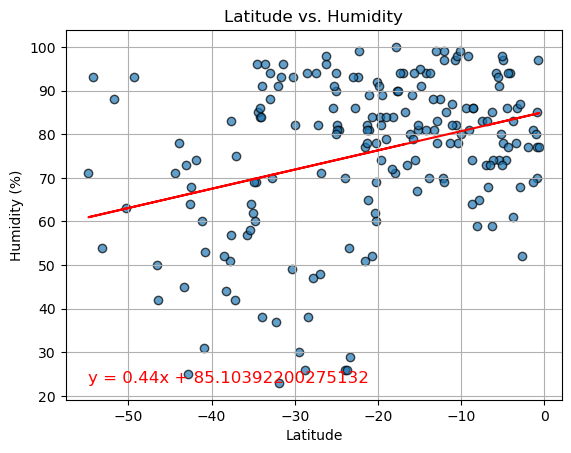

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity (%)",
                       "output_data/Linear_Reg_Southern_Hemi_Humidity.png")  

There is a weak positive linear relationship between latitude and humidity in both the Northern Hemisphere (R-value = 0.37) and the Southern Hemisphere (R-value = 0.34). The weak values indicate that there is not a strong correlation of increase in humidity to latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-Value is: 0.26


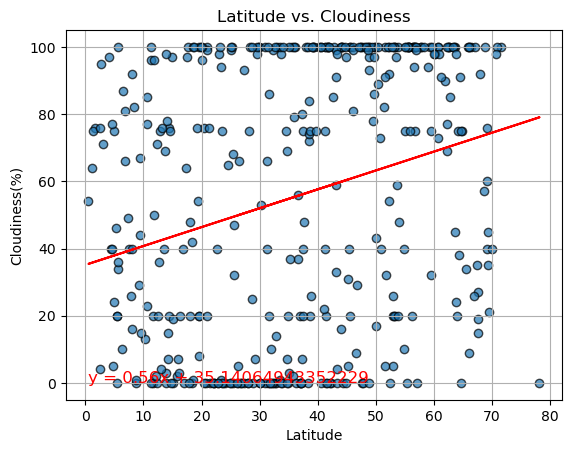

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness(%)",
                       "output_data/Linear_Reg_Northern_HemiCloudiness.png")

The R-Value is: 0.27


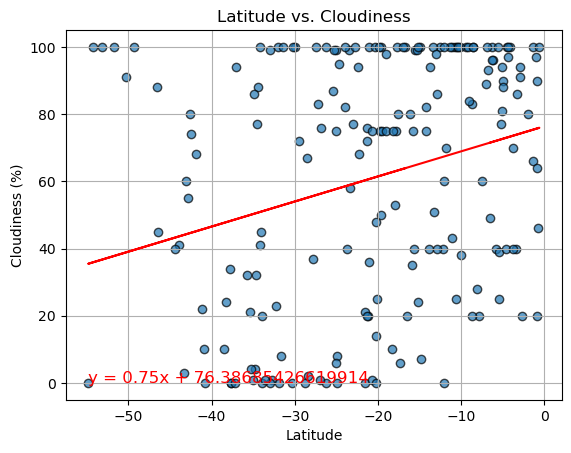

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)",
                       "output_data/Linear_Reg_Southern_Hemi_Cloudiness.png")

Northern Hemisphere with R-value of 0.25 shows a weak positive correlation between cloudiness and latitude. This shows that cloudiness tends to increase slightly as you move away from the equator towards higher latitudes. The correlation is not very strong.

Southern Hemisphere with the R-value of 0.42 shows  a weak positive correlation. Similarly, as you move towards higher latitudes in the Southern Hemisphere, there is a slight tendency for cloudiness to increase. The correlation is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

The R-Value is: -0.02


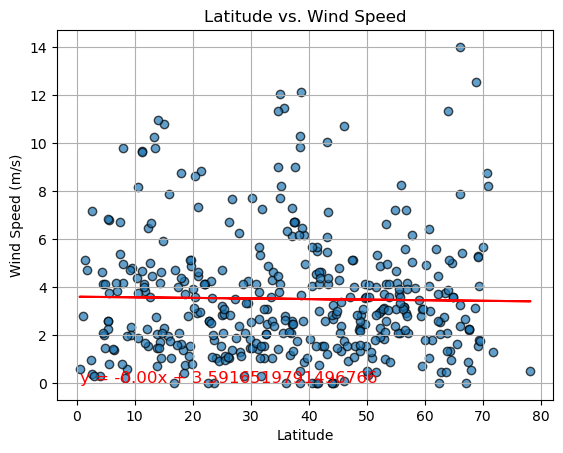

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)",
                       "output_data/Linear_Reg_Northern_Hemi_Wind_Speed.png")

The R-Value is: -0.18


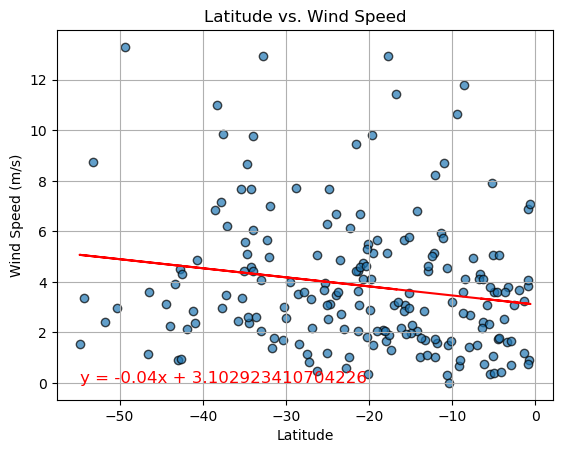

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)",
                       "output_data/Linear_Reg_Southern_Hemi_Wind_Speed.png")

There is a weak negative liner relationmship between wind speed and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere with R-value of -0.08 there is a weak negative correlation. This implies that there is a slight tendency for wind speed to decrease as you move away from the equator towards higher latitudes in the Northern Hemisphere.

In the Southern Hemisphere with R-value of -0.34 there is a weak negative correlation. Similarly this shows that as you move towards higher latitudes in the Southern Hemisphere, there is a slight tendency for wind speed to decrease.

In [25]:
# https://stackoverflow.com/questions/71898879/how-can-i-solve-the-cannot-save-file-into-a-non-existent-directory-parent
# https://learn.microsoft.com/en-us/answers/questions/1058457/oserror-cannot-save-file-into-a-non-existent-direc
# https://brainly.in/question/54753074
# https://earthobservatory.nasa.gov/images/85843/cloudy-earth#:~:text=As%20warm%2C%20moist%20air%20converges,Tropical%20Convergence%20Zone%20(ITCZ).
# https://www.weather.gov/source/zhu/ZHU_Training_Page/winds/Wx_Terms/Flight_Environment.htm
# https://saturncloud.io/blog/linear-regression-with-pandas-dataframe/
# https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas